In [1]:
import nltk
from nltk.tokenize import TweetTokenizer  # token by meaning word
from nltk.corpus import stopwords #english stopword
from prettytable import PrettyTable #table
import numpy as np
import math

#pip install nltk
#nltk.download('stopwords')

# # Read File

In [2]:
Document = []
for i in range(1,11):
    path = "E:\\level-4\\Term_1\\IR\\project\\Document\\" + str(i) + ".txt";
    file = open(path)
    Document.append(file.read())
    file.close();

In [3]:
for i in range(0,10):
    print("Document #" ,i+1 , " : ",Document[i])
#antony brutus caeser cleopatra mercy worser

Document # 1  :  antony brutus caeser cleopatra mercy worser
Document # 2  :  antony brutus caeser calpurnia 
Document # 3  :  mercy worser
Document # 4  :  brutus caeser mercy worser
Document # 5  :  caeser mercy worser
Document # 6  :  antony caeser mercy 
Document # 7  :  angels fools fear in rush to tread where
Document # 8  :  angels fools fear in rush to tread where
Document # 9  :  angels fools in rush to tread where
Document # 10  :  fools fear in rush to tread where


# #1 Tokenization

In [4]:
token = []
tknzr = TweetTokenizer() #take object Abd Al rahman
for i in range(0,10): #each document
    token.append(tknzr.tokenize(Document[i]))
print(token)

[['antony', 'brutus', 'caeser', 'cleopatra', 'mercy', 'worser'], ['antony', 'brutus', 'caeser', 'calpurnia'], ['mercy', 'worser'], ['brutus', 'caeser', 'mercy', 'worser'], ['caeser', 'mercy', 'worser'], ['antony', 'caeser', 'mercy'], ['angels', 'fools', 'fear', 'in', 'rush', 'to', 'tread', 'where'], ['angels', 'fools', 'fear', 'in', 'rush', 'to', 'tread', 'where'], ['angels', 'fools', 'in', 'rush', 'to', 'tread', 'where'], ['fools', 'fear', 'in', 'rush', 'to', 'tread', 'where']]


# #Remove stop words

In [5]:
english_stopwords = set(stopwords.words('english'))
#print(english_stopwords,"\n-----------------------------------------------------------------------------------------------\n")
Token = []
for i in range(0,10):
    Token.append([word for word in token[i] if word not in english_stopwords or word =='in' or word =='to'or word=='where'])
print (Token)

[['antony', 'brutus', 'caeser', 'cleopatra', 'mercy', 'worser'], ['antony', 'brutus', 'caeser', 'calpurnia'], ['mercy', 'worser'], ['brutus', 'caeser', 'mercy', 'worser'], ['caeser', 'mercy', 'worser'], ['antony', 'caeser', 'mercy'], ['angels', 'fools', 'fear', 'in', 'rush', 'to', 'tread', 'where'], ['angels', 'fools', 'fear', 'in', 'rush', 'to', 'tread', 'where'], ['angels', 'fools', 'in', 'rush', 'to', 'tread', 'where'], ['fools', 'fear', 'in', 'rush', 'to', 'tread', 'where']]


In [8]:
# get all terms 
Term = []    
for documnt in range(0,10):
    for term in range(0,len(Token[documnt])):
        if Token[documnt][term] not in Term:
            Term.append(Token[documnt][term])
            
N=len(Document) #number of documents
M=len(Term)     #number of terms
#print(f"N= {N}")
print("N =" , N , ", M =",M)
print("-------------------------------------------------------------------------------")
        
print ("Terms =",Term)
#contain [where term]

N = 10 , M = 15
-------------------------------------------------------------------------------
Terms = ['antony', 'brutus', 'caeser', 'cleopatra', 'mercy', 'worser', 'calpurnia', 'angels', 'fools', 'fear', 'in', 'rush', 'to', 'tread', 'where']


# #2 positional_index

In [9]:
positional_index = {}

for term in Term:
    for documnt in range(0,10):                     #['antony', 'brutus', 'caeser', 'cleopatra', 'mercy', 'worser']
        if term in Token[documnt]:
            position = []
            for pos in range(0,len(Token[documnt])):
                if term == Token[documnt][pos]:
                    position.append(pos)
            positional_index.setdefault(term, {})[documnt] = position #dictionary
        
for x in positional_index:
    print(x , ":\t" , positional_index[x])  

antony :	 {0: [0], 1: [0], 5: [0]}
brutus :	 {0: [1], 1: [1], 3: [0]}
caeser :	 {0: [2], 1: [2], 3: [1], 4: [0], 5: [1]}
cleopatra :	 {0: [3]}
mercy :	 {0: [4], 2: [0], 3: [2], 4: [1], 5: [2]}
worser :	 {0: [5], 2: [1], 3: [3], 4: [2]}
calpurnia :	 {1: [3]}
angels :	 {6: [0], 7: [0], 8: [0]}
fools :	 {6: [1], 7: [1], 8: [1], 9: [0]}
fear :	 {6: [2], 7: [2], 9: [1]}
in :	 {6: [3], 7: [3], 8: [2], 9: [2]}
rush :	 {6: [4], 7: [4], 8: [3], 9: [3]}
to :	 {6: [5], 7: [5], 8: [4], 9: [4]}
tread :	 {6: [6], 7: [6], 8: [5], 9: [5]}
where :	 {6: [7], 7: [7], 8: [6], 9: [6]}


### {Term : { D1: [0,2,5] , D3: [2,3] } }

# #2.2 Query Phrase 

In [18]:
def Clean(query):
    query = tknzr.tokenize(query) #tokenization / #Remove stopwords
    queryTokens = ([word for word in query if word not in english_stopwords or word =='in' or word =='to' or word=='where'])
    return queryTokens

                                                              #query = antony brutus
def Search(query):                                            #antony={0: [0], 1: [0], 5: [0]}
    query=Clean(query)                                        #brutus={0: [1], 1: [1], 3: [0]}
    
    doc_result={}
    if len(query) > 0 and query[0] in positional_index:        #query!=null & antony in positional_index ?
        doc_result = positional_index[query[0]]                # doc_result = {0: [0], 1: [0], 5: [0]} is antony list
    
        for i in range(1,len(query)):                          #i=1, query[1]=brutus
            Filter={}                                          #result of (antony & brutus)
            for doc in doc_result:                                     # doc = 0
                if query[i] in positional_index and doc in positional_index[query[i]]:#query[i]="brutus"/if doc(0) in brutus dictionary ?
                    for index in doc_result[doc]:                      # index = 0
                        if index+1 in positional_index[query[i]][doc]: # if indx+1=(1) in [brutus][D0] list ?
                            
                            if doc in Filter:
                                Filter[doc].append(index+1)
                            else: 
                                Filter[doc] = [index+1]                 # first insertion
            doc_result = Filter
    if len(doc_result) == 0:
        return "none"
    else:
        return doc_result

In [19]:
query = input("Enter Your Query: ")
x = Search(query)
if x=='none':
    print(x)
else:
    for doc in x:
        s = "D" + str(doc+1)
        print(s, end = ' ')

Enter Your Query: antony
D1 D2 D6 

# Document Ranked 

### (1) Term Frequence (tf)
#### [ Number of the term in each doc ]

In [20]:
def printTable(Matrix):
    table = PrettyTable()
    table.field_names=[" ","D1", "D2", "D3","D4", "D5", "D6","D7", "D8", "D9","D10"]
    for i in range(0,M):
        l = []
        l.append(Term[i])
        for j in range(0,N):
            l.append(Matrix[i][j])
        table.add_row(l)
    print(table)

In [21]:
tf = []
for t in Term:
    row = []
    for i in range(0,10):
        row.append(Token[i].count(t))
    tf.append(row)
#print-----------------------------------------------------------------------------       
print("'tf'\n")
printTable(tf)

'tf'

+-----------+----+----+----+----+----+----+----+----+----+-----+
|           | D1 | D2 | D3 | D4 | D5 | D6 | D7 | D8 | D9 | D10 |
+-----------+----+----+----+----+----+----+----+----+----+-----+
|   antony  | 1  | 1  | 0  | 0  | 0  | 1  | 0  | 0  | 0  |  0  |
|   brutus  | 1  | 1  | 0  | 1  | 0  | 0  | 0  | 0  | 0  |  0  |
|   caeser  | 1  | 1  | 0  | 1  | 1  | 1  | 0  | 0  | 0  |  0  |
| cleopatra | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  |  0  |
|   mercy   | 1  | 0  | 1  | 1  | 1  | 1  | 0  | 0  | 0  |  0  |
|   worser  | 1  | 0  | 1  | 1  | 1  | 0  | 0  | 0  | 0  |  0  |
| calpurnia | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  |  0  |
|   angels  | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 1  |  0  |
|   fools   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 1  |  1  |
|    fear   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 0  |  1  |
|     in    | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 1  |  1  |
|    rush   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 1  |  1  |
|     to    | 0  | 

### (2) w tf(1+log(tf))

In [22]:
#M=15 , N=10 (M*N)

tf_wt = tf
for i in range(0,M):
    for j in range(0,N):
        if tf[i][j]==0:
            tf_wt[i][j]=0
        else:
            tf_wt[i][j]=1 + math.log10(tf[i][j])
#print-----------------------------------------------------------------------------       

print("'tf_wt'\n")
printTable(tf_wt)

'tf_wt'

+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|           |  D1 |  D2 |  D3 |  D4 |  D5 |  D6 |  D7 |  D8 |  D9 | D10 |
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   antony  | 1.0 | 1.0 |  0  |  0  |  0  | 1.0 |  0  |  0  |  0  |  0  |
|   brutus  | 1.0 | 1.0 |  0  | 1.0 |  0  |  0  |  0  |  0  |  0  |  0  |
|   caeser  | 1.0 | 1.0 |  0  | 1.0 | 1.0 | 1.0 |  0  |  0  |  0  |  0  |
| cleopatra | 1.0 |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|   mercy   | 1.0 |  0  | 1.0 | 1.0 | 1.0 | 1.0 |  0  |  0  |  0  |  0  |
|   worser  | 1.0 |  0  | 1.0 | 1.0 | 1.0 |  0  |  0  |  0  |  0  |  0  |
| calpurnia |  0  | 1.0 |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |
|   angels  |  0  |  0  |  0  |  0  |  0  |  0  | 1.0 | 1.0 | 1.0 |  0  |
|   fools   |  0  |  0  |  0  |  0  |  0  |  0  | 1.0 | 1.0 | 1.0 | 1.0 |
|    fear   |  0  |  0  |  0  |  0  |  0  |  0  | 1.0 | 1.0 |  0  | 1.0 |
|     in    |  0  |  0  |  0 

### (3) Document Frequency(df) , Inverse Document Frequency(idf) 
#### df = Number of the doc 
#### idf = log10(N/df)

In [23]:
df=[]
idf=[]

for i in range(0,M):
    df.append(len(positional_index[Term[i]]))
    if df[i] == 0:
        idf.append(0)  
    else: 
        idf.append(round(math.log10(N/df[i]),10))

#print----------------------------------------------------------------------------- 

table = PrettyTable()
table.field_names=[" ","df", "idf"]
for i in range(0,M):
    table.add_row([ Term[i], df[i] , idf[i] ]) 
print(table)
        

+-----------+----+--------------+
|           | df |     idf      |
+-----------+----+--------------+
|   antony  | 3  | 0.5228787453 |
|   brutus  | 3  | 0.5228787453 |
|   caeser  | 5  | 0.3010299957 |
| cleopatra | 1  |     1.0      |
|   mercy   | 5  | 0.3010299957 |
|   worser  | 4  | 0.3979400087 |
| calpurnia | 1  |     1.0      |
|   angels  | 3  | 0.5228787453 |
|   fools   | 4  | 0.3979400087 |
|    fear   | 3  | 0.5228787453 |
|     in    | 4  | 0.3979400087 |
|    rush   | 4  | 0.3979400087 |
|     to    | 4  | 0.3979400087 |
|   tread   | 4  | 0.3979400087 |
|   where   | 4  | 0.3979400087 |
+-----------+----+--------------+


### (4) tf*idf
#### tf_wt * idf

In [24]:
tf_idf = []
for i in range(0,M): #term
    row=[]
    for j in range(0,N): #document
        row.append(round(tf_wt[i][j]*idf[i],6))
    tf_idf.append(row)
    
#print-----------------------------------------------------------------------------     

print("'tf_idf'")
printTable(tf_idf)

'tf_idf'
+-----------+----------+----------+---------+----------+---------+----------+----------+----------+----------+----------+
|           |    D1    |    D2    |    D3   |    D4    |    D5   |    D6    |    D7    |    D8    |    D9    |   D10    |
+-----------+----------+----------+---------+----------+---------+----------+----------+----------+----------+----------+
|   antony  | 0.522879 | 0.522879 |   0.0   |   0.0    |   0.0   | 0.522879 |   0.0    |   0.0    |   0.0    |   0.0    |
|   brutus  | 0.522879 | 0.522879 |   0.0   | 0.522879 |   0.0   |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |
|   caeser  | 0.30103  | 0.30103  |   0.0   | 0.30103  | 0.30103 | 0.30103  |   0.0    |   0.0    |   0.0    |   0.0    |
| cleopatra |   1.0    |   0.0    |   0.0   |   0.0    |   0.0   |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |
|   mercy   | 0.30103  |   0.0    | 0.30103 | 0.30103  | 0.30103 | 0.30103  |   0.0    |   0.0    |   0.0    |   0.0    |
|   worser  | 0

### (5) Document length
#### doc length = for each vector(column) in matrix tf*idf 
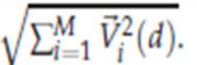

In [25]:
doc_length = []
for doc in range(0,N): #document
    Sum = 0
    for t in range(0,M): #term
        Sum+=(tf_idf[t][doc]*tf_idf[t][doc])
    doc_length.append(round(math.sqrt(Sum),9))
    
#print-----------------------------------------------------------------------------

for i in range(0,N):
    print("d"+str(i+1),"length   ",doc_length[i])
    

d1 length    1.373462509
d2 length    1.279618677
d3 length    0.498974252
d4 length    0.782941131
d5 length    0.582747257
d6 length    0.674270399
d7 length    1.223495958
d8 length    1.223495958
d9 length    1.106137383
d10 length    1.106137383


### (6) Normalized tf.idf
#### each cell / doc_length(docN)

In [26]:
doc_nliz = []
for i in range(0,M): #term
    row=[]
    for j in range(0,N): #document
        row.append(round(tf_idf[i][j]/doc_length[j],6))
        #print(tf_idf[i][j] , doc_length[j])
    doc_nliz.append(row)
        
#print----------------------------------------------------------------------------- 

print("'doc_nliz'")
printTable(doc_nliz)

'doc_nliz'
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|           |    D1    |    D2    |    D3    |    D4    |    D5    |    D6    |    D7    |    D8    |    D9    |   D10    |
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|   antony  | 0.380701 | 0.408621 |   0.0    |   0.0    |   0.0    | 0.775474 |   0.0    |   0.0    |   0.0    |   0.0    |
|   brutus  | 0.380701 | 0.408621 |   0.0    | 0.667839 |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |
|   caeser  | 0.219176 | 0.23525  |   0.0    | 0.384486 | 0.51657  | 0.446453 |   0.0    |   0.0    |   0.0    |   0.0    |
| cleopatra | 0.728087 |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |   0.0    |
|   mercy   | 0.219176 |   0.0    | 0.603298 | 0.384486 | 0.51657  | 0.446453 |   0.0    |   0.0    |   0.0    |   0.0   

# Query

In [27]:
def getQueryNormalized(query):
    query=Clean(query)
# ----------------------------- (1) tf
    query_tf = []
    for t in Term:
        query_tf.append(query.count(t))
#------------------------------ (2) tf_wt
    query_tf_tw = []
    for i in range(0,M):
        if query_tf[i] == 0:
            query_tf_tw.append(0)
        else:
            query_tf_tw.append(round(1 + math.log10(query_tf[i]),9))
#------------------------------ (3) idf calculated
#------------------------------ (4) tf*idf
    query_tf_idf = []
    for i in range(0,M): #term
        query_tf_idf.append(round(query_tf[i]*idf[i],9))
#------------------------------ (5) query length
    Sum=0
    for i in range(0,M): #term
        Sum+=query_tf_idf[i]*query_tf_idf[i]
    query_length=round(math.sqrt(Sum),9)
#----------------------------- (6) Normalized
    query_nliz = []
    for i in range(0,M): #term
        query_nliz.append(round(query_tf_idf[i]/query_length,9))
#------------------------------ print Table
    table = PrettyTable()
    table.field_names=[" ","tf", "tf_tw", "idf", "tf_idf", "nliz"]
    for i in range(0,M):
        table.add_row([Term[i], query_tf[i], query_tf_tw[i], idf[i], query_tf_idf[i], query_nliz[i]])
    print(table)
    print("query length =",query_length)

    return query_nliz

In [28]:
def getScore(q_nliz,docN):        
    score=0
    for i in range(0,M):
        score+=q_nliz[i]*doc_nliz[i][docN]
    return score

In [29]:
while True:
    query = input("Enter Your Query: ")
    if query == "":
        break
    result = Search(query)
    if result == "none":
        print(result)
    else :
        q_nliz=getQueryNormalized(query)
        score = []
        for docN in result:
            sc=getScore(q_nliz,docN)
            p=( sc , docN)
            score.append(p)
            print("Cosine similarity","doc"+str(docN+1),"=",sc)
            
        score.sort(reverse=True)
        print("Returned doc = ",end = ' ')
        for doc in score:
            s = "D" + str(doc[1]+1)
            print(s, end = ' ')        
    print("\n=========================================================================================================================\n")    

#antony brutus    
#antony caeser
#brutus caeser
#to tread where

Enter Your Query: antony brutus
+-----------+----+-------+--------------+-------------+-------------+
|           | tf | tf_tw |     idf      |    tf_idf   |     nliz    |
+-----------+----+-------+--------------+-------------+-------------+
|   antony  | 1  |  1.0  | 0.5228787453 | 0.522878745 | 0.707106781 |
|   brutus  | 1  |  1.0  | 0.5228787453 | 0.522878745 | 0.707106781 |
|   caeser  | 0  |   0   | 0.3010299957 |     0.0     |     0.0     |
| cleopatra | 0  |   0   |     1.0      |     0.0     |     0.0     |
|   mercy   | 0  |   0   | 0.3010299957 |     0.0     |     0.0     |
|   worser  | 0  |   0   | 0.3979400087 |     0.0     |     0.0     |
| calpurnia | 0  |   0   |     1.0      |     0.0     |     0.0     |
|   angels  | 0  |   0   | 0.5228787453 |     0.0     |     0.0     |
|   fools   | 0  |   0   | 0.3979400087 |     0.0     |     0.0     |
|    fear   | 0  |   0   | 0.5228787453 |     0.0     |     0.0     |
|     in    | 0  |   0   | 0.3979400087 |     0.0     |   